In [5]:
import numpy as np # math arrays manipulation
import pandas as pd # for data management
import os 
    
import matplotlib.pyplot as plt #plots
import seaborn as sns #plots

In [7]:
path = os.getcwd() + "/data/nobel-prize-laureates.csv"
df = pd.read_csv(path)

# keep the ones that have values in both Born and Organization country
df = df.dropna(axis=0, subset=['Organization country'])
df = df.dropna(axis=0, subset=['Born country'])

# percentage of the ones with same Born and Organization country
same_lst = df['Born country'] == df['Organization country']
sum(same_lst)/len(same_lst)

0.6521739130434783

In [4]:
# create the column the countries that have the same Born and Organization country
df['New'] = df.apply(lambda x: x['Born country'] if x['Born country'] == x['Organization country'] else np.nan, axis=1)
print(df)

      Id                   Born country Born country code  \
0    107                            USA                US   
1    114           India (now Pakistan)                PK   
2    118                the Netherlands                NL   
3    140                         Canada                CA   
5    960                            USA                US   
..   ...                            ...               ...   
970  319                the Netherlands                NL   
971  332  Austria-Hungary (now Hungary)                HU   
972  372                 United Kingdom                GB   
973  378           Germany (now Poland)                PL   
974  382                         France                FR   

    Organization country              New  
0                    USA              USA  
1                  Italy              NaN  
2                    USA              NaN  
3                    USA              NaN  
5                    USA              USA  
.. 

<AxesSubplot:>

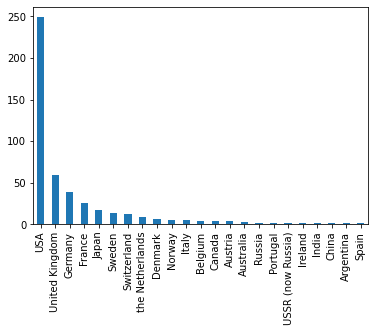

In [5]:
# distribution of the column
df['New'].value_counts().plot(kind='bar')

In [33]:
df['New'].nunique()

23

In [6]:
# create a new column for the countries whose Organization country is different from its Born Countries
df['New2'] = df.apply(lambda x: x['Born country'] if x['Born country'] != x['Organization country'] else np.nan, axis=1)

In [34]:
df['New2'].nunique()

80

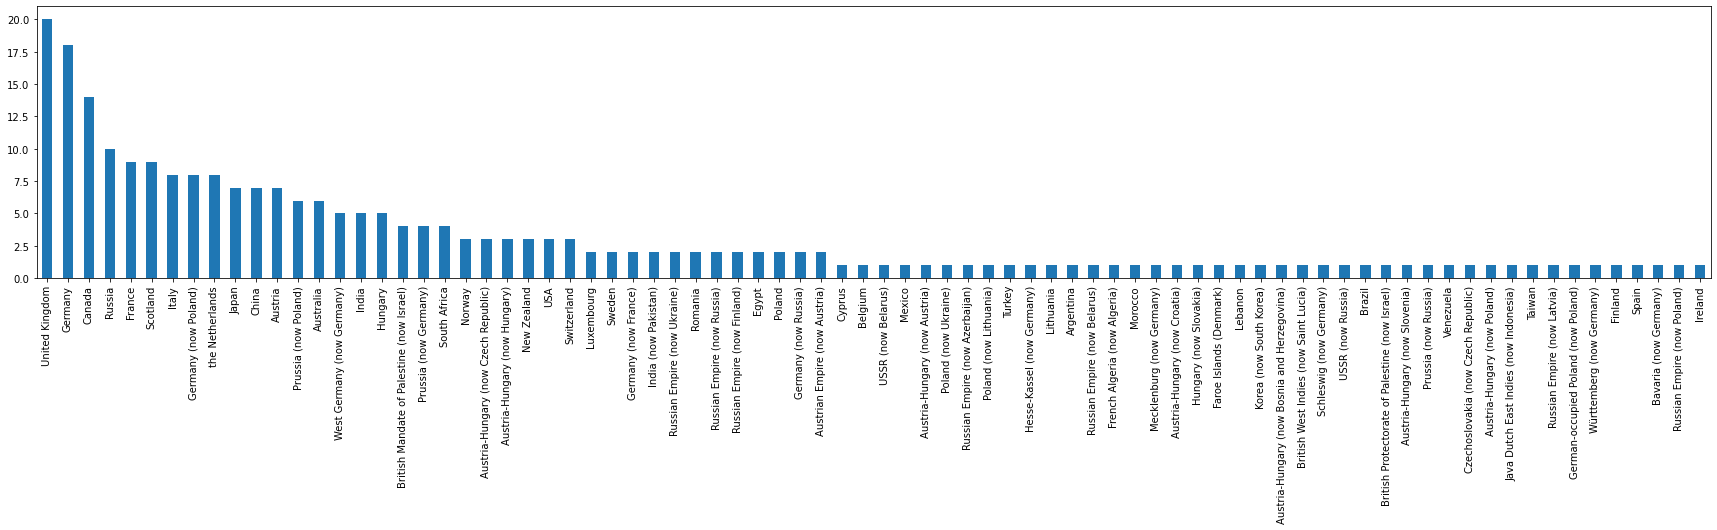

In [7]:
# distribution of the column
plt.figure(figsize=(30, 5))
df['New2'].value_counts().plot(kind='bar')
plt.show()

In [28]:
import nltk
from wordcloud import WordCloud

text = df['New2'].values 


text = ' '.join(nltk.word_tokenize(str(text)))
cloud = WordCloud().generate(text)
cloud.to_file('output_diff.png')

In [29]:
import nltk
from wordcloud import WordCloud

text = df['New'].values 


text = ' '.join(nltk.word_tokenize(str(text)))
cloud = WordCloud().generate(text)
cloud.to_file('output_same.png')

In [31]:
s = set(df['New2']) - set(df['New'])
print(s)
s = list(set(df['New2']) - set(df['New']))

{'British Protectorate of Palestine (now Israel)', 'Austria-Hungary (now Croatia)', 'French Algeria (now Algeria)', 'Poland', 'Egypt', 'Austrian Empire (now Austria)', 'Cyprus', 'Faroe Islands (Denmark)', 'Poland (now Ukraine)', 'Turkey', 'Prussia (now Poland)', 'Bavaria (now Germany)', 'Austria-Hungary (now Austria)', 'Lebanon', 'Lithuania', 'Luxembourg', 'West Germany (now Germany)', 'Finland', 'Württemberg (now Germany)', 'Taiwan', 'Austria-Hungary (now Czech Republic)', 'Austria-Hungary (now Poland)', 'Schleswig (now Germany)', 'Hungary', 'Romania', 'British Mandate of Palestine (now Israel)', 'British West Indies (now Saint Lucia)', 'Hesse-Kassel (now Germany)', 'Russian Empire (now Latvia)', 'Korea (now South Korea)', 'South Africa', 'Brazil', 'Russian Empire (now Finland)', 'Austria-Hungary (now Slovenia)', 'Venezuela', 'Hungary (now Slovakia)', 'Java Dutch East Indies (now Indonesia)', 'Germany (now Poland)', 'Russian Empire (now Poland)', 'Czechoslovakia (now Czech Republic)',

['British Protectorate of Palestine (now Israel)',
 'Austria-Hungary (now Croatia)',
 'French Algeria (now Algeria)',
 'Poland',
 'Egypt',
 'Austrian Empire (now Austria)',
 'Cyprus',
 'Faroe Islands (Denmark)',
 'Poland (now Ukraine)',
 'Turkey',
 'Prussia (now Poland)',
 'Bavaria (now Germany)',
 'Austria-Hungary (now Austria)',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'West Germany (now Germany)',
 'Finland',
 'Württemberg (now Germany)',
 'Taiwan',
 'Austria-Hungary (now Czech Republic)',
 'Austria-Hungary (now Poland)',
 'Schleswig (now Germany)',
 'Hungary',
 'Romania',
 'British Mandate of Palestine (now Israel)',
 'British West Indies (now Saint Lucia)',
 'Hesse-Kassel (now Germany)',
 'Russian Empire (now Latvia)',
 'Korea (now South Korea)',
 'South Africa',
 'Brazil',
 'Russian Empire (now Finland)',
 'Austria-Hungary (now Slovenia)',
 'Venezuela',
 'Hungary (now Slovakia)',
 'Java Dutch East Indies (now Indonesia)',
 'Germany (now Poland)',
 'Russian Empire (now Poland)',


In [32]:
text = s

text = ' '.join(nltk.word_tokenize(str(text)))
cloud = WordCloud().generate(text)
cloud.to_file('output_diff_count.png')